In [10]:
from SimPEG import *
from simpegEM1D import EM1D, EM1DSurveyTD, Utils1D, get_vertical_discretization_time, set_mesh_1d, piecewise_pulse
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\sgkan\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [11]:
waveform_hm = np.array([[-4.0000e-03,  0.0000e+00],
       [-3.8466e-03,  5.2912e-01],
       [-3.6938e-03,  9.5788e-01],
       [-2.0303e-03,  9.7876e-01],
       [ 0.0000e+00,  1.0000e+00],
       [ 5.5685e-05,  8.3052e-01],
       [ 1.6612e-04,  4.6587e-01],
       [ 2.6988e-04,  1.0691e-01],
       [ 2.9125e-04,  3.2476e-02],
       [ 2.9661e-04,  1.3861e-02],
       [ 2.9887e-04,  7.3212e-03],
       [ 3.0011e-04,  3.4380e-03],
       [ 3.0146e-04,  0.0000e+00]])
waveform_lm = np.array([[-8.0000e-04,  0.0000e+00],
       [-7.1457e-04,  1.3730e-01],
       [-5.6482e-04,  3.2358e-01],
       [-3.3766e-04,  5.9175e-01],
       [ 0.0000e+00,  1.0000e+00],
       [ 3.0000e-07,  9.9553e-01],
       [ 6.7000e-07,  9.7411e-01],
       [ 1.0500e-06,  9.3899e-01],
       [ 1.4700e-06,  8.8829e-01],
       [ 2.2600e-06,  7.7080e-01],
       [ 4.3400e-06,  4.2752e-01],
       [ 5.0500e-06,  3.2518e-01],
       [ 5.7300e-06,  2.3933e-01],
       [ 6.3600e-06,  1.7128e-01],
       [ 6.9900e-06,  1.1432e-01],
       [ 8.3000e-06,  2.8827e-02],
       [ 9.8300e-06, -2.4728e-02],
       [ 1.1660e-05, -4.5077e-02],
       [ 2.0050e-05,  0.0000e+00]])
times_hm = np.array([7.525000e-05, 8.226000e-05, 9.125000e-05, 1.027500e-04,
       1.172500e-04, 1.352500e-04, 1.577400e-04, 1.857400e-04,
       2.212400e-04, 2.667400e-04, 3.237400e-04, 3.957400e-04,
       4.867400e-04, 6.007400e-04, 7.447400e-04, 9.262400e-04,
       1.155040e-03, 1.443040e-03, 1.807040e-03, 2.266040e-03,
       2.844040e-03, 3.563040e-03, 4.443040e-03, 5.520040e-03,
       6.838040e-03, 8.452040e-03, 1.042704e-02])
times_lm = np.array([1e-6, 8.16000e-06, 1.51700e-05, 2.41600e-05, 3.56600e-05, 5.01600e-05,
       6.81600e-05, 9.06500e-05, 1.18650e-04, 1.54150e-04, 1.99650e-04,
       2.56650e-04, 3.28650e-04, 4.19650e-04, 5.33650e-04, 6.77650e-04,
       8.59150e-04, 1.08795e-03, 1.37595e-03])

In [12]:
hz = np.array([ 3. ,  3.2,  3.4,  3.7,  3.9,  4.2,  4.5,  4.8,  5.1,  5.5,  5.9,
        6.3,  6.7,  7.2,  7.7,  8.2,  8.8,  9.4, 10.1, 10.8, 11.5, 12.3,
       13.2, 14.1, 15. , 16.1, 17.2, 18.4, 19.7, 21.1, 22.5, 24.1, 25.8,
       27.5, 29.5, 31.5, 33.7, 36. , 38.5])
# hz = 1 * 1.1 ** np.arange(39)

In [19]:

mesh1D = set_mesh_1d(hz)
depth = -mesh1D.gridN[:-1]
LocSigZ = -mesh1D.gridCC

time_input_currents_HM = waveform_hm[:,0]
input_currents_HM = waveform_hm[:,1]
time_input_currents_LM = waveform_lm[:,0]
input_currents_LM = waveform_lm[:,1]

TDsurvey = EM1DSurveyTD(
    rx_location = np.array([0., 0., 100.+40.]),
    src_location = np.array([0., 0., 100.+40.]),
    topo = np.r_[0., 0., 100.],
    depth = depth,
    rx_type = 'dBzdt',
    wave_type = 'general',
    src_type = 'CircularLoop',
    a = 13.,
    I = 1.,
    time = times_hm,
    time_input_currents=time_input_currents_HM,
    input_currents=input_currents_HM,
    n_pulse = 2,
    base_frequency = 30.,
    use_lowpass_filter=False,
    high_cut_frequency=210*1e3,
    moment_type='dual',
    time_dual_moment = times_lm,    
    time_input_currents_dual_moment=time_input_currents_LM,
    input_currents_dual_moment=input_currents_LM,
    base_frequency_dual_moment=210,    
)
sig_half = 1./20.
chi_half = 0.
expmap = Maps.ExpMap(mesh1D)

sig  = np.ones(TDsurvey.n_layer)*1./10.
# blk_ind = -10<LocSigZ
# sig[blk_ind] = 1./25.
blk_ind = (-20<LocSigZ)
sig[blk_ind] = 1./20
# blk_ind = (-100>LocSigZ) & (-120<LocSigZ)
blk_ind = (-50>LocSigZ)
sig[blk_ind] = 1./30.
# sig = np.array([0.05      , 0.05      , 0.05      , 0.05      , 0.05      ,
#        0.04676819, 0.05627753, 0.05851019, 0.06165885, 0.0495769 ,
#        0.05385057, 0.03775347, 0.02196765, 0.03761661, 0.03859435,
#        0.04784194, 0.04674671, 0.06007302, 0.06458068, 0.05938843,
#        0.06336716, 0.07098393, 0.06204936, 0.05586466, 0.0491847 ,
#        0.04464843, 0.05745333, 0.0900724 , 0.05905577, 0.04904954,
#        0.05039054, 0.05      , 0.05      , 0.05      , 0.05      ,
#        0.05      , 0.05      , 0.05      , 0.05      ])
m_true = np.log(sig)

prob = EM1D(mesh1D, sigmaMap=expmap, verbose=False)
if prob.ispaired:
    prob.unpair()
if TDsurvey.ispaired:
    TDsurvey.unpair()
prob.pair(TDsurvey)
prob.chi = np.zeros(TDsurvey.n_layer)
d_true = TDsurvey.dpred(m_true)
# d = TDsurvey.dpred(m_true)

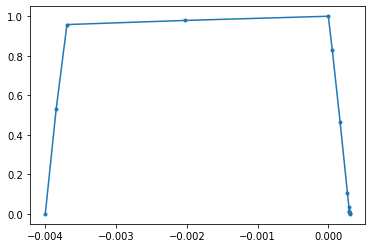

In [20]:
plt.plot(time_input_currents_HM, input_currents_HM, '.-')

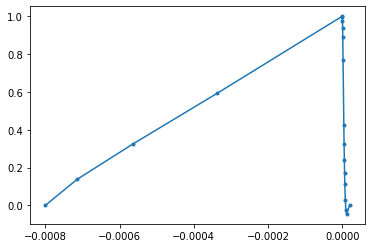

In [21]:
plt.plot(time_input_currents_LM, input_currents_LM, '.-')

(200, 0)

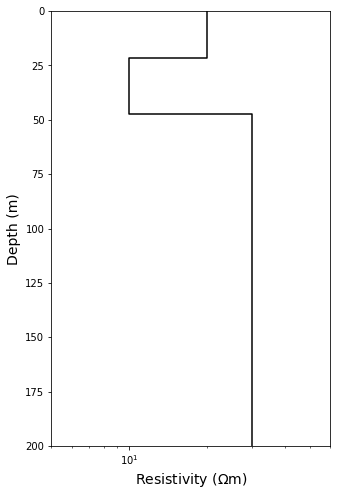

In [22]:
fig, ax = subplots(1,1, figsize=(5, 8))
Utils1D.plotLayer(1./sig, mesh1D, showlayers=False)
ax.set_xlabel("Resistivity ($\Omega$m)")
ax.set_ylim(200, 0)

Text(0, 0.5, 'Voltage (V/A)')

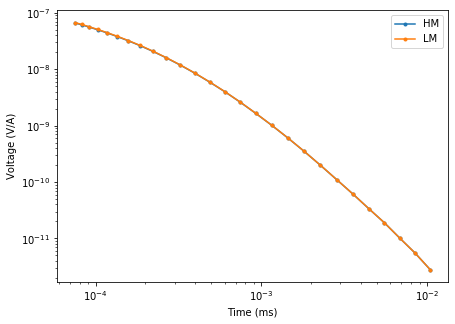

In [24]:

fig, axes = subplots(1,1, figsize = (7,5))
axes.plot(TDsurvey.time, -d_true[:TDsurvey.n_time], '.-')
axes.plot(TDsurvey.time, -d[:TDsurvey.n_time], '.-')

axes.set_xscale('log');
axes.set_yscale('log');
plt.legend(("HM", "LM"))
axes.set_xlabel("Time (ms)")
axes.set_ylabel("Voltage (V/A)")

In [72]:

mesh1D = set_mesh_1d(hz)
depth = -mesh1D.gridN[:-1]
LocSigZ = -mesh1D.gridCC

time_input_currents_HM = waveform_hm[:,0]
input_currents_HM = waveform_hm[:,1]
time_input_currents_LM = waveform_lm[:,0]
input_currents_LM = waveform_lm[:,1]

TDsurvey = EM1DSurveyTD(
    rx_location = np.array([0., 0., 100.+40]),
    src_location = np.array([0., 0., 100.+40]),
    topo = np.r_[0., 0., 100.],
    depth = depth,
    rx_type = 'dBzdt',
    wave_type = 'general',
    src_type = 'CircularLoop',
    a = 13.,
    I = 1.,
    time = times_hm,
    time_input_currents=time_input_currents_HM,
    input_currents=input_currents_HM,
    n_pulse = 2,
    base_frequency = 25.,
    use_lowpass_filter=True,
    high_cut_frequency=210*1e3,
    moment_type='dual',
    time_dual_moment = times_lm,    
    time_input_currents_dual_moment=time_input_currents_LM,
    input_currents_dual_moment=input_currents_LM,
    base_frequency_dual_moment=210,    
)
sig_half = 1./20.
chi_half = 0.
expmap = Maps.ExpMap(mesh1D)
prob = EM1D(mesh1D, sigmaMap=expmap, verbose=False)
if prob.ispaired:
    prob.unpair()
if TDsurvey.ispaired:
    TDsurvey.unpair()
prob.pair(TDsurvey)
prob.chi = np.zeros(TDsurvey.n_layer)

SimPEG.DataMisfit.l2_DataMisfit assigning default std of 5%
SimPEG.DataMisfit.l2_DataMisfit assigning default eps of 1e-5 * ||dobs||

    SimPEG.InvProblem is setting bfgsH0 to the inverse of the eval2Deriv.
    ***Done using same Solver and solverOpts as the problem***
model has any nan: 0
=============================== Projected GNCG ===============================
  #     beta     phi_d     phi_m       f      |proj(x-g)-x|  LS    Comment   
-----------------------------------------------------------------------------
x0 has any nan: 0
   0  1.90e+03  1.16e+04  0.00e+00  1.16e+04    9.24e+03      0              
   1  9.51e+02  2.22e+03  6.18e-01  2.80e+03    2.49e+03      0              
   2  4.75e+02  3.99e+02  9.33e-01  8.42e+02    6.30e+02      0   Skip BFGS  
   3  2.38e+02  1.71e+02  1.06e+00  4.24e+02    1.57e+02      0   Skip BFGS  
   4  1.19e+02  9.23e+01  1.29e+00  2.45e+02    9.02e+01      0   Skip BFGS  
   5  5.94e+01  5.25e+01  1.53e+00  1.43e+02    5.19e+01      0  

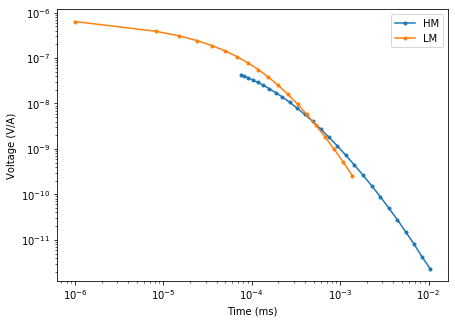

In [73]:

fig, axes = subplots(1,1, figsize = (7,5))
axes.plot(TDsurvey.time, -d_true[:TDsurvey.n_time], '.-')
axes.plot(TDsurvey.time_dual_moment, -d_true[TDsurvey.n_time:], '.-')
axes.set_xscale('log');
axes.set_yscale('log');
plt.legend(("HM", "LM"))
axes.set_xlabel("Time (ms)")
axes.set_ylabel("Voltage (V/A)")

np.random.seed(1)
TDsurvey.dtrue = d_true
std = 0.03
noise = std*abs(TDsurvey.dtrue)*np.random.randn(*TDsurvey.dtrue.shape)
floor = np.r_[np.ones_like(times_hm)*1e-15, np.ones_like(times_lm)*1e-13]
std = 0.03
TDsurvey.dobs = TDsurvey.dtrue+noise
uncert = abs(TDsurvey.dobs)*std+floor
dmisfit = DataMisfit.l2_DataMisfit(TDsurvey)
uncert = (abs(TDsurvey.dobs)*std+floor)
dmisfit.W = 1./ uncert
blk_ind = (-100>LocSigZ)
m0 = np.ones(mesh1D.nC) * np.log(1./20)
# m0[blk_ind] = np.log(1./500.)
# d_0 = TDsurvey.dpred(m0)

reg = Regularization.Sparse(
    mesh1D,
    mapping=Maps.IdentityMap(mesh1D),
    alpha_s=1e-3,
    alpha_x=1.,
    mref=m0
)
p = 2
qx, qz = 0, 0
reg.norms = np.c_[p, qx, qz, 0.]
IRLS = Directives.Update_IRLS(
    maxIRLSiter=50, minGNiter=1, fix_Jmatrix=True, coolingRate=2, 
    betaSearch=False,
    chifact_start = 1.,
    f_min_change=1e-10
)
opt = Optimization.ProjectedGNCG(maxIter = 50, maxIterCG=50, tolCG=1e-4)
invProb = InvProblem.BaseInvProblem(dmisfit, reg, opt)
beta = Directives.BetaSchedule(coolingFactor=2., coolingRate=1)
betaest = Directives.BetaEstimate_ByEig(beta0_ratio=1e0)
target = Directives.TargetMisfit()
# update_sense = Directives.UpdateSensitivityWeights(threshold=delta)
# inv = Inversion.BaseInversion(invProb, directiveList=[IRLS, betaest])
inv = Inversion.BaseInversion(invProb, directiveList=[beta, betaest, target])
prob.counter = opt.counter = Utils.Counter()
opt.LSshorten = 0.5
opt.remember('xc')
mopt = inv.run(m0)

(10, 1000)

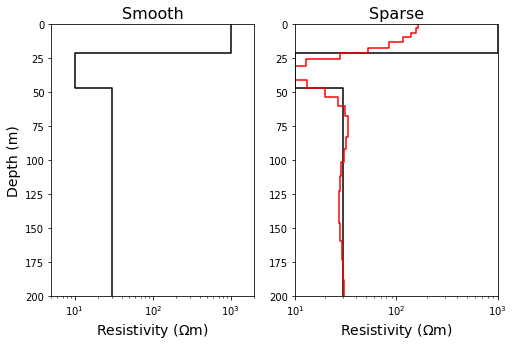

In [74]:
fig, axs = subplots(1,2, figsize=(8, 5))
Utils1D.plotLayer(1./sig, mesh1D, ax=axs[0])
Utils1D.plotLayer(1./sig, mesh1D, ax=axs[1])
# Utils1D.plotLayer(1./(expmap*invProb.l2model), mesh1D, showlayers=False, **{'color':'r'}, ax=axs[0])
Utils1D.plotLayer(1./(expmap*mopt), mesh1D, showlayers=False, **{'color':'r'}, ax=axs[1])
axs[1].set_ylabel("")
axs[0].set_title("Smooth", fontsize = 16)
axs[1].set_title("Sparse", fontsize = 16)
for ax in axs:
    ax.set_ylim(200, 0)
    ax.set_xlabel("Resistivity ($\Omega$m)")
ax.set_xlim(10, 1000)    

In [75]:
# fig, axs = subplots(1,2, figsize=(8, 5))
# Utils1D.plotLayer(1./sig, mesh1D, ax=axs[0])
# Utils1D.plotLayer(1./sig, mesh1D, ax=axs[1])
# Utils1D.plotLayer(1./(expmap*invProb.l2model), mesh1D, showlayers=False, **{'color':'r'}, ax=axs[0])
# Utils1D.plotLayer(1./(expmap*mopt), mesh1D, showlayers=False, **{'color':'r'}, ax=axs[1])
# axs[1].set_ylabel("")
# axs[0].set_title("Smooth", fontsize = 16)
# axs[1].set_title("Sparse", fontsize = 16)
# for ax in axs:
#     ax.set_ylim(200, 0)
#     ax.set_xlabel("Resistivity ($\Omega$m)")
# ax.set_xlim(10, 1000)    

Text(0, 0.5, 'Voltage (V/A)')

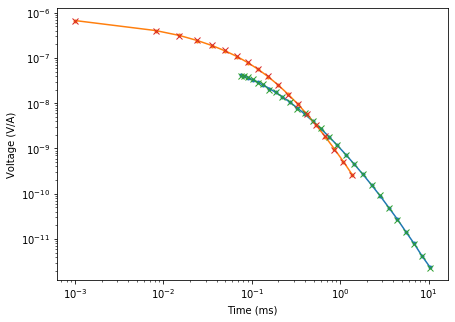

In [76]:
fig, axes = subplots(1,1, figsize = (7,5))
axes.plot(TDsurvey.time*1e3, -invProb.dpred[:TDsurvey.n_time], '.-')
axes.plot(TDsurvey.time_dual_moment*1e3, -invProb.dpred[TDsurvey.n_time:], '.-')
axes.plot(TDsurvey.time*1e3, -TDsurvey.dobs[:TDsurvey.n_time], 'x')
axes.plot(TDsurvey.time_dual_moment*1e3, -TDsurvey.dobs[TDsurvey.n_time:], 'x')
axes.set_xscale('log')
axes.set_yscale('log')
axes.set_xlabel("Time (ms)")
axes.set_ylabel("Voltage (V/A)")